J sumanth Kumar

20191COM0083

5COM-2

# Machine Learning  - Linear Regression

In this exercise we'll implement simple linear regression using gradient descent and apply it to an example problem.  We'll also extend our implementation to handle multiple variables and apply it to a slightly more difficult example.

## Linear regression with one variable

In the first part of the exercise, we're tasked with implementing linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

Let's start by importing some libraries and examining the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv("/content/ex1data1.txt",header=None, names=['Population', 'Profit'])
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Let's plot it to get a better idea of what the data looks like.

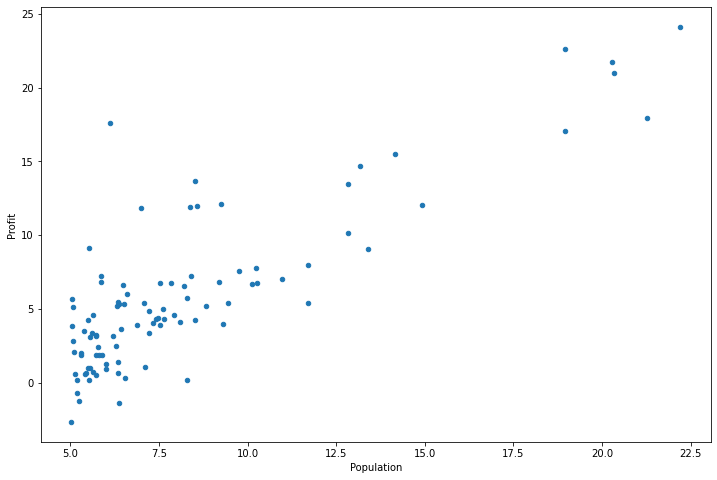

In [7]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Now let's implement linear regression using gradient descent to minimize the cost function.  The equations implemented in the following code samples are detailed in "ex1.pdf" in the "exercises" folder.

First we'll create a function to compute the cost of a given solution (characterized by the parameters theta).

In [8]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

In [9]:
data.insert(0, 'Ones', 1)

Now let's do some variable initialization.

In [12]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Let's take a look to make sure X (training set) and y (target variable) look correct.

In [14]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [15]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so we need to convert X and y before we can use them.  We also need to initialize theta.

In [16]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

Here's what theta looks like.

In [17]:
theta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.

In [18]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for theta).

In [19]:
computeCost(X, y, theta)

32.072733877455676

So far so good.  Now we need to define a function to perform gradient descent on the parameters theta using the update rules defined in the text.

In [20]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform.

In [21]:
alpha = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [22]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [23]:
computeCost(X, y, g)

4.515955503078912

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

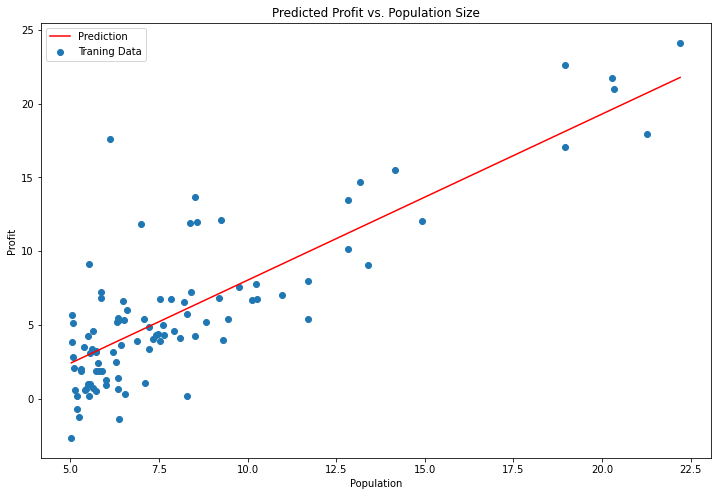

In [24]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

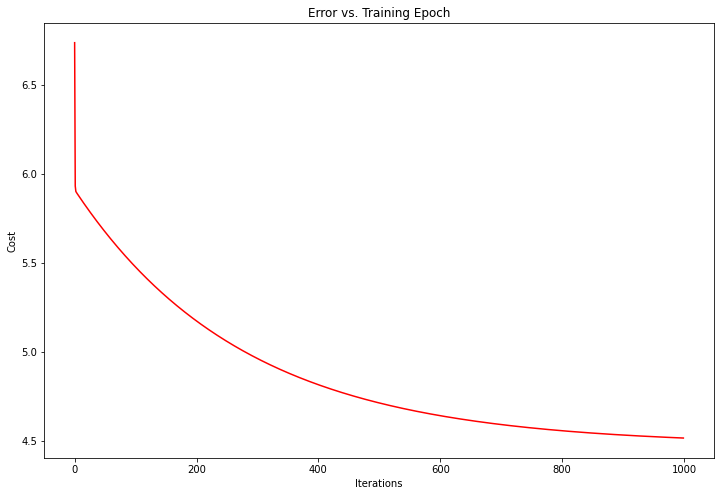

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')